In [1]:
from jupyterquiz import display_quiz

# Combinatorics

*"Counting is the religion of this generation... Anybody can count..." -- Gertrude Stein*

For fair experiments with a finite sample space $S$, we used Axiom III of the Axioms of Probability to show that the probability of an event $E$ is simply

$$
P(E) = \frac{|E|}{|S|}
$$

Thus, the problem of calculating $P(E)$ is simplified to counting the cardinalities of $S$ and $E$. As most people have learned to count as young children, this sounds like a simple exercise. However, in practice, this is often quite challenging. In fact, this general problem space is rich enough that this branch of mathematics has its own name:

````{panels}
DEFINTION
^^^
combinatorics:
*Combinatorics* is the mathematics of counting. 
````

For the data science topics covered in this book, we do not have to deal with many very challenging counting problems. However, if you look back over the past chapters, you may be discover that several problems have already been introduced that could be solve by counting:
* In Chapter 2, we asked "If you only observe 6 heads on the 20 flips, should you reject the idea that the coin is fair?" We solved this problem via simulating flipping a fair coin 20 times and determining the probability of seeing 6 or fewer heads. However, if we record the ordered Heads and Tails outcomes, this is a fair experiment, and so we could solve for the same probability by counting the number of outcomes with 6 or fewer heads.
* In Chapter 3, we conducted a bootstrap test where we randomly split the data for the 50 US states into two sets of 25. When determining how many random draws we might use, it is useful to know how many ways there are to partition the data in this way. This is a combinatorics problem.
* In {doc}`fair-experiments.ipynb`, the relative frequencies were shown for the sum of two fair 6-sided dice, as used in Monopoly. If we record the ordered set of top faces of the dice, then the set experiment is a fair experiment, and we can calculate the exact probabilities for the sum of the faces using combinatorics.


Note that the first and third examples are both types of combined experiments, which consist of a sequence of subexperiments. Suppose there are $K$ subexperiments, and the sample space for the $i$th subexperiment is $S_i$. Then the sample space for the combined experiment is 

$$
S = \left\{\left. \left(s_0, s_1, \ldots, s_{K-1} \right) \right| s_0 \in S_0, s_1 \in S_1, \ldots s_{K-1} \in S_{K-1} \right\}.
$$

This notation for $S$ is tedious. We introduce the following operator to simplify the notation for the sample space:

````{panels}
DEFINTION
^^^
cartesian product:
The *cartesian product* of two sets $A$ and $B$ is denoted $A \times B$ and is defined by 

$$
A \times B = \{ (a,b) | a \in A \mbox{ and } b \in B\}.
$$

That is, it is the set of all two-tuples with the first element from set $A$ and the second element from set $B$.
````

We can form the sample space for our repeated experiment through repeated application of the Cartesian product to the individual sample spaces:

$$
S= S_0 \times S_1  \times \ldots \times S_{K-1}
$$

## Enumerating Sample Spaces and Events Using IterTools

Let's start by enumerating $S$ and showing how it can be used to calculate probabilities. We will use the Python `itertools` library,  which is distributed as part of standard Python distributions to enumerate $S$. Begin by importing this library:

In [2]:
import itertools

**Example 1: Monopoly Dice**

Consider counting for the Monopoly dice problem. The simulated values for the relative frequencies are shown below:

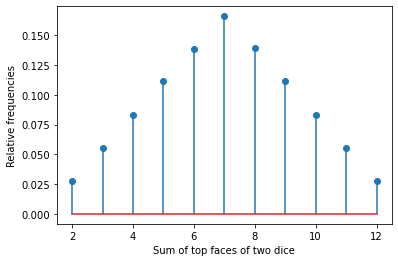

In [3]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

die1=npr.randint(1, 7, size=1_000_000)
die2=npr.randint(1, 7, size=1_000_000)
dice=die1+die2

vals, counts=np.unique(dice, return_counts=True)
rel_freqs=counts/len(dice)

plt.stem(vals,rel_freqs, use_line_collection=True)
plt.xlabel("Sum of top faces of two dice")
plt.ylabel("Relative frequencies");

 The sample spaces for the two dice are the same. In Python, we can define them using simple ranges:

In [4]:
S0 = range(1,7)
S1 = range(1,7)

The `itertools` library has a `product` function to carry out the Cartesian product over these two ranges:

In [5]:
S= itertools.product( S0, S1 )

In [6]:
for s in S: 
    print(s, ' ', end='')

(1, 1)  (1, 2)  (1, 3)  (1, 4)  (1, 5)  (1, 6)  (2, 1)  (2, 2)  (2, 3)  (2, 4)  (2, 5)  (2, 6)  (3, 1)  (3, 2)  (3, 3)  (3, 4)  (3, 5)  (3, 6)  (4, 1)  (4, 2)  (4, 3)  (4, 4)  (4, 5)  (4, 6)  (5, 1)  (5, 2)  (5, 3)  (5, 4)  (5, 5)  (5, 6)  (6, 1)  (6, 2)  (6, 3)  (6, 4)  (6, 5)  (6, 6)  

```{warning}
Note that the `itertools` functions generally provide an *iterator* to go over the resulting set. Iterators will produce values until exhausted. Unlike looping over a range or list, you cannot execute the loop again using the iterator once it has reached the end. The number of items to be iterated over also cannot be directly determined -- you must iterate over all of the items to determine how many there are.
```

When the number of items being iterated over is small, the iterator can be used to directly create a list of these items:

In [7]:
Slist=list(itertools.product( S0, S1 ))
print(Slist)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


As expected from our previous examples, there are 36 items in the sample space:

In [8]:
len(Slist)

36

We can find the probability for the sums of the dice faces by iterating over $S$ and counting the number of times  each sum occurs. It is easy to see that the sum of the faces will be between 2 and 12. We initalize a list with 13 zeros (from 0 to 12) to store the counts.

In [9]:
counts=[0]*13
for s in Slist:
    counts[sum(s)]+=1

print("sum:", "# ways of occurring")
for c in range(2,13):
    print(c,":", counts[c])
    
    

sum: # ways of occurring
2 : 1
3 : 2
4 : 3
5 : 4
6 : 5
7 : 6
8 : 5
9 : 4
10 : 3
11 : 2
12 : 1


The right-hand column is the cardinality of the event described by the left-hand column. As the events partition the sample space (i.e., the are disjoint and cover everything in the sample space), the sum of the right-hand column is equal to the cardinality of $S$:

In [10]:
sum (counts), len(Slist)

(36, 36)

If we let $E_i$ denote the event that the sum of the dice faces is $i$, then $P(E_i) = |E_i| / |S|$, where the values of $|E_i|$ are given in the table above. Thus, the probabilities are:

In [11]:
probs=[0]*13

print("sum: probability")
for c in range(2,13):
    probs[c]=counts[c]/len(Slist)
    print(c, ": ", probs[c])

sum: probability
2 :  0.027777777777777776
3 :  0.05555555555555555
4 :  0.08333333333333333
5 :  0.1111111111111111
6 :  0.1388888888888889
7 :  0.16666666666666666
8 :  0.1388888888888889
9 :  0.1111111111111111
10 :  0.08333333333333333
11 :  0.05555555555555555
12 :  0.027777777777777776


Let's plot the analytical result along with simulated values:

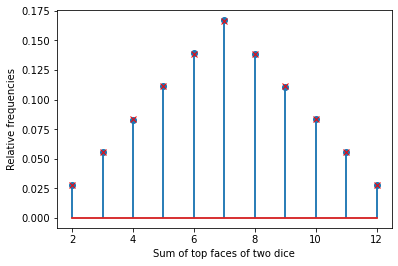

In [12]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

die1=npr.randint(1, 7, size=1_000_000)
die2=npr.randint(1, 7, size=1_000_000)
dice=die1+die2

vals, mycounts=np.unique(dice, return_counts=True)
rel_freqs=mycounts/len(dice)

plt.stem(vals,rel_freqs, use_line_collection=True)
plt.stem(range(2,13),probs[2:13], markerfmt='rx', use_line_collection=True)


plt.xlabel("Sum of top faces of two dice")
plt.ylabel("Relative frequencies");

The relative frequencies match the true (analytical) probabilities quite closely.

**Example 2: Flipping a Fair Coin 20 Times**

Now consider flipping a fair coin 20 times and determining the probability of an outcome less than or equal to 6. Each of the 20 subexperiments has the same sample space. Using $H$ to denote heads and $T$ to denote tails, we can refer to these sample spaces as:

In [13]:
Si= ['H', 'T']

We can create an iterator for the combined sample space using `itertools.product` by passing `Si` and the keyword argument `repeat` with the number of repetitions as follows:

In [14]:
Sdice=itertools.product(Si,repeat=20)

We can count the cardinality of the sample space and the event that the number of heads is 6 or less simultaneously while looping over the outcomes in the sample space:

In [15]:
Sdice=itertools.product(Si,repeat=20)

Scount=0
Ecount=0

for s in Sdice:
    Scount+=1
    if s.count('H') <= 6:
        Ecount+=1
        
print("|E|=", Ecount, "   |S|=", Scount)

|E|= 60460    |S|= 1048576


The the probability of seeing 6 or fewer heads is:


In [16]:
print("P(6 or fewer heads)=", Ecount/Scount)

P(6 or fewer heads)= 0.057659149169921875


Compare this value with the estimated probability found via simulation in {doc}`../02-first-stats/first-stats.ipynb`. The two values are very close, so the simulation did a good job at estimating this probability (at least with 1,000,000 iterations). Note that you probably don't want to go through all 1,048,576 outcomes by hand. Moreover, if the number of coin flips increased significantly, it may be challenging to even iterate over them. This motivates us to develop mathematical methods for counting the cardinalities of sample spaces and events without enumerating them.

## Determining Cardinalities of Sample Spaces and Events Mathematically

We start with a basic result on counting in the context of sample spaces for combined experiments. If $S$ is a set that can be written as a Cartesian product,

$$
S= S_0 \times S_1  \times \ldots \times S_{K-1},
$$

then cardinality of $S$ is the product of the cardinalities of the sets in the Cartesian product:
$$
|S|= |S_0| \cdot |S_1|  \cdot \ldots \cdot |S_{K-1}|.
$$

For instance, for the Monopoly dice problem, $|S_0|=|S_1|=6$, so $|S| = |S_0| \cdot |S_1| = 6 \cdot 6 = 36$.

For flipping a fair coin 20 times, $|S_i| = 2$, and $|S| = |S_0| \cdot |S_1| \cdot \ldots \cdot |S_{19}| = 2^{20} = 1,048,576$

**Example: Monopoly Dice**

Let's consider how to find the probability for a particular value of the sum of the dice. Let $E_8$ be the event that the sum of the numbers on the top faces of the two dice is 10. To find $P(E_{10})$, we have to determine $|E_{10}|$. Note that if we know the value of the first die, then the value of the second die is determined. Moreover, not all values of the first die can result in a sum of 10. So we just need to determine what values of the first die **can** result in sums of 10. The smallest value of the first die that can result in a sum of 10 will occur when the second die has a value of 6. So, the first die must be at least 4. Clearly, if it is larger than 4, there will be a value of the second die that results in a sum of 10. From this, we conclude that $|E_{10}|=3$. To be explicite, 

$$
E_3 = \left\{ (4,6),~(5,5),~(6,4) \right\}.
$$

Then $P(E_3) = 3/36 = 1/12$

In [17]:
1/12

0.08333333333333333

(Reader, please compare this with the probability found through enumeration in the version of this example using `itertools`.) 

**Example: Flipping a Fair Coin 20 Times**

This experimental set up seems even easier than the Monopoly dice problem because of the small size of the subexperiment sample spaces, but enumerating the event that the number of heads is 6 or fewer turns out to be much more challenging and will require us to introduce some new mathematical tools. Before we get to that, let's answer a few questions that will help us build to our ultimate result:

Let $H_i$ be the event that there are **exactly** $i$ heads on the 20 flips.

First, what is $|H_0|$? There is exactly one way to get zero heads. All of the 20 flips were tails.

Next, what is $|H_1|$? There is exactly one head in the 20 flips. It can either be on the first flip, the second flip, ..., or finally the 20th flip. In other words, there are 20 different places for the heads to be, so $|H_1|=20$.

Now, what is $|H_2|$? This is where things start to get challenging and interesting.  We will solve this two ways. The first way will get us the answer. The second way will help lead us to a general solution for $H_i$.

**Counting $H_2$: Way 1**

We can count $|H_2|$ in much the same way that we counted $H_1$. For convenience, let's consider the flips in order. For each place the first heads occurs, we will have multiple places that the second heads could occur.  I.e., if the first heads is on flip 0, then the second heads can be on flips 1 through 19. But if the first head is on flip 18, the second head has to be on flip 19. The total number of outcomes in $H_2$ can thus be written as

\begin{align*}
|H_2| &= \sum_{i=0}^{18} \sum_{j=i+1}^{19} 1 \\
&= \sum_{i=0}^{18} \left[ 19 - \left( i+1 \right) +1 \right] \\
&= 19\cdot 20   - \sum_{i=1}^{19} i \\
&= 380 - \frac{19 \cdot 20}{2} \\
&= 190,
\end{align*}
(The last summation is a standard form.)

Note that we could have used Python to calculate this sum:

In [18]:
total=0
for i in range(0,19):
    for j in range(i+1, 20):
       total+=1
print(total)

190


**Exercise**

Extend the approach described above to give a formula for the $|H_3|$. (For this purpose, I recommend you use three summation terms, although a more general and sophisticated solution for skilled programmers can be created using recursion.) Use Python to evaluate the sum. Check your answer using the self-assessment quiz below:

In [19]:
# Correct value
total=0
for i in range(0,18):
    for j in range(i+1, 19):
        for k in range(j+1, 20):
           total+=1
print(total)

1140


In [20]:
#Erroneous bounds
total=0
for i in range(0,19):
    for j in range(i+1, 20):
        for k in range(i+1, 20):
           total+=1
print(total)

2470


Verify that this is correct using the usual binomial formula:

In [21]:
from scipy.special import binom
binom(20,3)

1140.0

In [22]:
display_quiz("https://raw.githubusercontent.com/jmshea/intro-data-science-for-engineers/main/questions/three_heads.json")

This approach will get increasingly tedious and challenging to write and compute as we consider $H_i$ for larger $i$.

**Counting $H_2$: Way 2**



Consider a second approach in which we try to count how many ways we could create the result (i.e., an $n$ tuple) of the flips:
* The first heads can go in any of the 20 places.
* The second heads can go in any of the remaining 19 places. 

Then the total number of results is $20 \cdot 19 = 380$. 

**But this result does not match up with  the one we just computed in detail! Why?** 

The reason is that we have **overcounted**. For instance, let's mark the first value we choose by underlining it.  Then here are two outcomes we will find this way (values not shown are all $T$): 

$$
(\underline{H}, T, T, H, T, \ldots) \\
(H, T, T, \underline{H}, T, \ldots)
$$

Our counting mechanism has created two different representations (*orderings*) of the same outcome (i.e., where there is a heads on rolls 0 and 3). The number we will count in this way is twice the total number because for any particular outcome, there are two different orders by which we could have created it (i.e., by putting  the first $H$ in the leftmost position or by putting the first $H$ in the rightmost position). So, we have to divide by two to get: $|H_2| = 20 \cdot 19 /2 =190$, which agrees with our previous result.  

But now let's consider how we can rewrite this value to make it extensible to find $H_i$ for $i>2$.

We first introduce the number of ways that a set of objects can be ordered:
````{panels}
DEFINTION
^^^
permutation:
A *permutation* is an ordering (or reordering) of a set of objects.
````

Given $n$ distinct objects, it is not hard to calculate the number of permutations possible. Consider drawing the objects one at a time, until all objects have been drawn, to create the ordered set of objects:
* There are $n$ ways to choose the first object.
* Then there are $n-1$ ways to choose the second object from the remaining set.
* Then there $n-2$ ways to choose the third object from the remaining set.
* ...
* On the final ($n$th) draw, there is only one object remaining in the set.

**The number of permutations of $n$ distinct objects is written as $n!$, which is read "$n$ factorial" (en fact-or-ee-ul). The rules for Cartesian products can be applied to calculate **

$$
n! = n(n-1)(n-2)\cdots(2)(1).
$$


In Python, I recommend you use the factorial function from SciPy.special. If the argument is not more than 20, I would recommend to pass the keyword parameter `exact=True` to get back an integer solution. 



In [23]:
from scipy.special import factorial

Then the number of ways that 20 unique objects can be arranged is 

In [24]:
factorial(20, exact=True)

2432902008176640000

## THIS IS STILL IN PROGRESS